In [1]:
import os
import yaml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

rdir="results/tres_noise"
# rdir="results/benchmarks2"

datasets = [d for d in os.listdir(f"../{rdir}") if not d.startswith(".")]

results = []
curves = []
for part in ("train", "test"):
    for dset in datasets:
        dirs =  [d for d in os.listdir(f"../{rdir}/{dset}") if not d.startswith(".")]

        for dir in dirs:
            runs = [d for d in os.listdir(f"../{rdir}/{dset}/{dir}") if not d.startswith(".")] 
            for seed in runs:
                try:
                    exp_dir = f"../{rdir}/{dset}/{dir}/{seed}"
                    with open(f"{exp_dir}/metrics_{part}.yaml", 'r') as io:
                        metrics = yaml.safe_load(io)

                    with open(f"{exp_dir}/config.yaml", 'r') as io:
                        cfg = yaml.safe_load(io)
                    metrics['seed'] = int(seed)
                    metrics['dataset'] = dset
                    metrics['dir'] = dir
                    metrics["part"] = part
                    results.append(metrics)

                    curve = pd.read_csv(f"{exp_dir}/curve.csv")
                    curve['seed'] = int(seed)
                    curve['dir'] = dir
                    curve['dataset'] = dset
                    curve["part"] = part
                    curves.append(curve)
                except:
                    pass

results = pd.DataFrame(results)
curves = pd.concat(curves)

pd.set_option('display.max_colwidth', -1)
results.groupby(['part', 'dataset', 'dir']).mean().reset_index()

/tmp/ipykernel_91404/1776107879.py:40: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,part,dataset,dir,aipw_curve_error,best_iter,best_val,gps_ratio_loss,last_saved_epoch,outcome_loss,plugin_curve_error,total_loss,tr_curve_error,tr_loss,seed
0,test,ihdp-N,--dataset ihdp-N --noise 0.05,0.495052,9961.5,0.073660,0.339456,9999.0,0.262490,0.495973,0.601946,0.496590,2.624336,9.5
1,test,ihdp-N,--dataset ihdp-N --noise 0.05 --tr_reg,0.425180,9896.5,0.039935,0.338894,9999.0,0.175020,0.421059,0.688939,0.421853,1.750248,9.5
2,test,ihdp-N,--dataset ihdp-N --noise 0.1,0.451658,9921.5,0.073488,0.339270,9999.0,0.257703,0.452936,0.596973,0.453181,2.576757,9.5
3,test,ihdp-N,--dataset ihdp-N --noise 0.1 --tr_reg,0.392404,9921.5,0.039611,0.339338,9999.0,0.170635,0.392231,0.680629,0.393150,1.706561,9.5
4,test,ihdp-N,--dataset ihdp-N --noise 0.5,0.199109,9926.5,0.086622,0.339128,9999.0,0.308115,0.211459,0.647243,0.208852,3.080209,9.5
5,test,ihdp-N,--dataset ihdp-N --noise 0.5 --tr_reg,0.175637,9899.0,0.047819,0.338766,9999.0,0.201192,0.184135,0.741094,0.182009,2.011359,9.5
6,test,news-N,--dataset news-N --noise 0.05,0.027688,9881.5,0.003516,0.347909,9999.0,0.023144,0.028100,0.371054,0.027976,0.231475,9.5
7,test,news-N,--dataset news-N --noise 0.05 --tr_reg,0.026031,9739.0,0.001743,0.347912,9999.0,0.017713,0.026872,0.383342,0.026959,0.177172,9.5
8,test,news-N,--dataset news-N --noise 0.1,0.023977,9896.5,0.003912,0.346735,9999.0,0.024420,0.024368,0.371156,0.024334,0.244243,9.5
9,test,news-N,--dataset news-N --noise 0.1 --tr_reg,0.025678,9776.5,0.001825,0.346738,9999.0,0.017719,0.025648,0.382179,0.025487,0.177228,9.5


In [3]:
# results.groupby(['dataset', 'dir']).std().reset_index()

Plot curves

In [4]:
# curves_means = curves.groupby(['dataset', 'var', 'ratio', 'delta']).mean().reset_index().set_index(['dataset', 'var', 'ratio'])
# curves_stdevs = curves.groupby(['dataset', 'var', 'ratio', 'delta']).std().reset_index().set_index(['dataset', 'var', 'ratio'])
# # D_var0_ratio0 = curves[curves.combo == 0]
# curves_means

In [5]:
curves.dataset.unique()
# curves

array(['ihdp-N', 'sim-N', 'news-N'], dtype=object)

========== ihdp-N-train =========
(1200, 19)


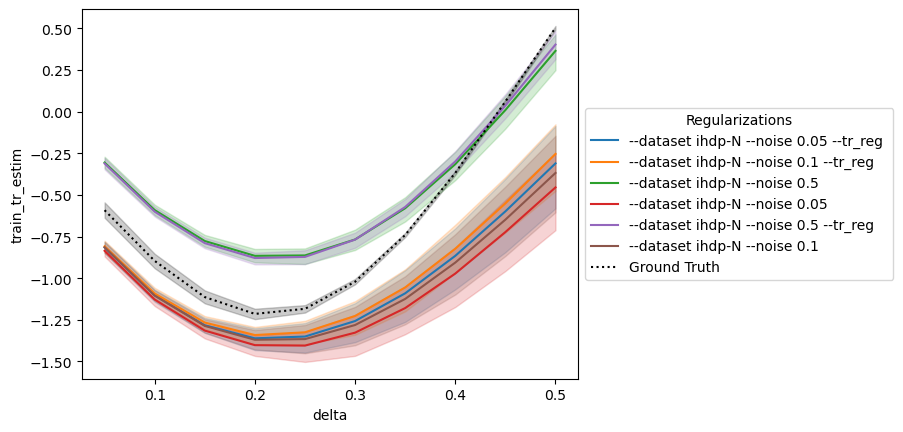

========== sim-N-train =========
(1200, 19)


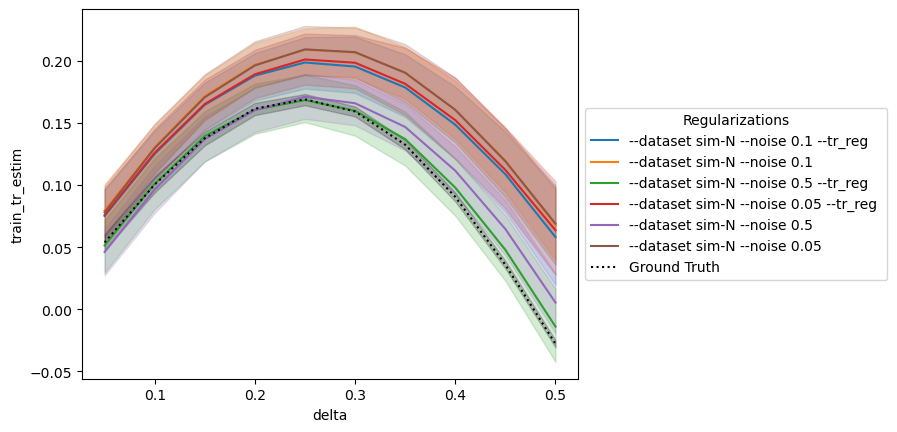

========== news-N-train =========
(1200, 19)


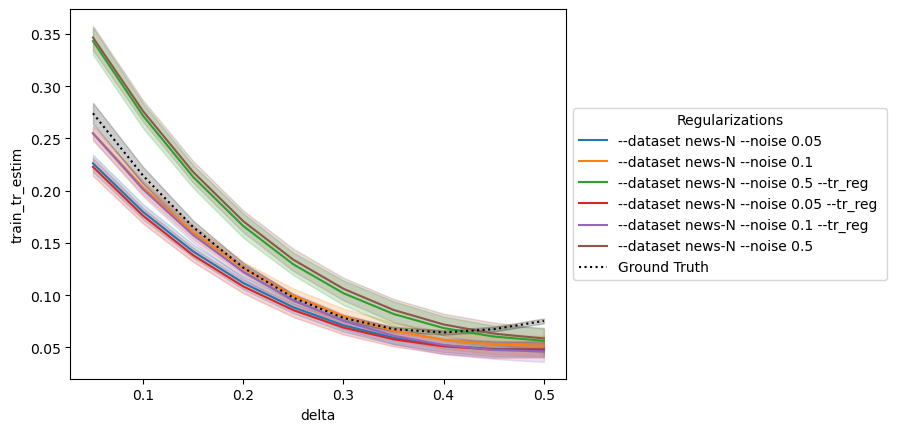

========== ihdp-N-test =========
(1200, 19)


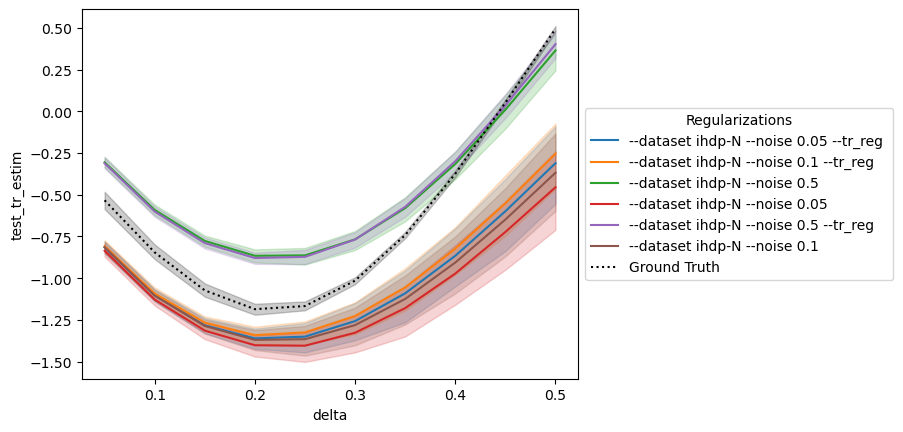

========== sim-N-test =========
(1200, 19)


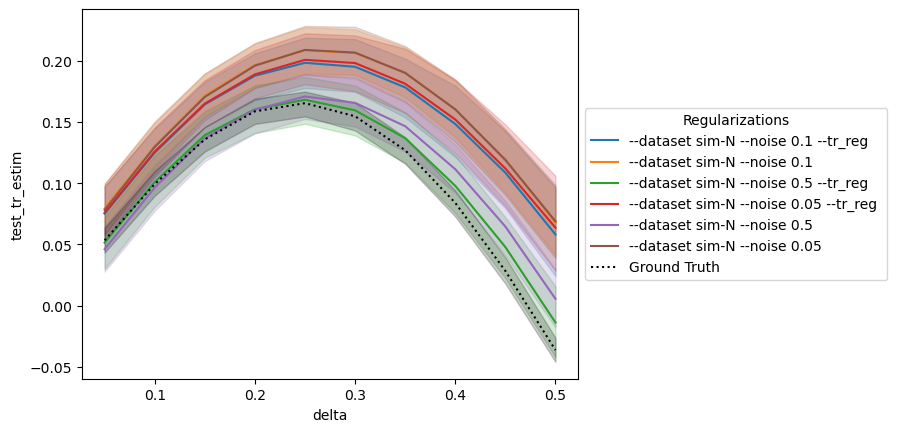

========== news-N-test =========
(1200, 19)


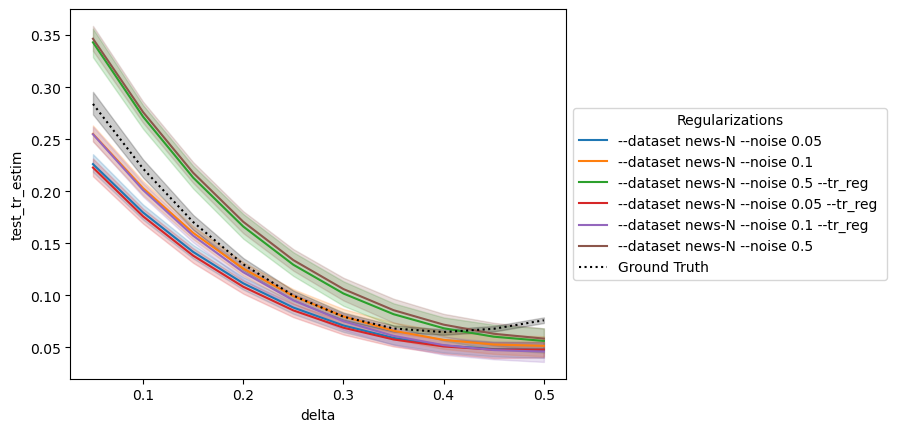

In [6]:

for part in ("train", "test"):
    for dset in datasets:
        print(f"========== {dset}-{part} =========")
        D = curves[(curves.dataset == dset) & (curves.part == part)].drop_duplicates(["delta", "dir", "seed"])
        D = D.fillna(0)
        truth = D[D.dir == D.dir.iloc[0]][["delta", f"{part}_truth"]]
        print(D.shape)
        sns.lineplot(x="delta", y=f"{part}_tr_estim", hue="dir", data=D, legend=True)
        # sns.lineplot(x="delta", y=f"{part}_aipw_estim", hue="dir", data=D, legend=True, ls="--")
        sns.lineplot(x="delta", y=f"{part}_truth", label="Ground Truth", c="black", ls=":", data=D, legend=True)
        plt.legend(title='Regularizations', loc='center left', bbox_to_anchor=(1, 0.5))
    
        plt.show()